### Week 2 Task

![Week 2 Task](Week_2_Task.png) 

Importing Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
img = Image.open('img.jpg')
img = np.array(img)
img.shape

(256, 256)

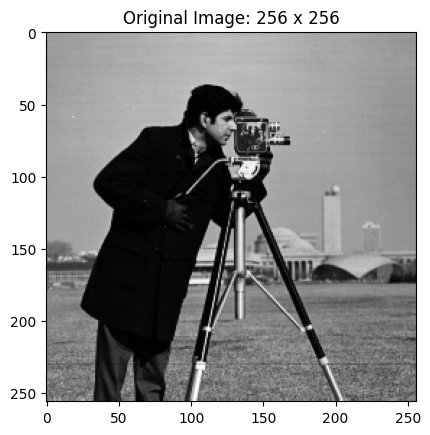

In [22]:
plt.imshow(img, cmap='gray')
plt.title('Original Image: 256 x 256')
plt.show()

In [67]:
img = Image.open('img.jpg')
resized_img = img.resize((256, 256))
resized_img = np.array(resized_img)
resized_img.shape

(256, 256)

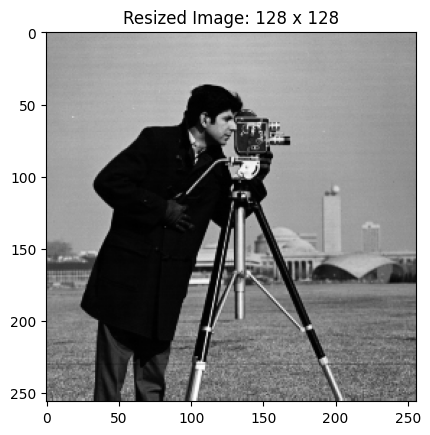

In [68]:
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image: 128 x 128')
plt.show()

Image Smoothening

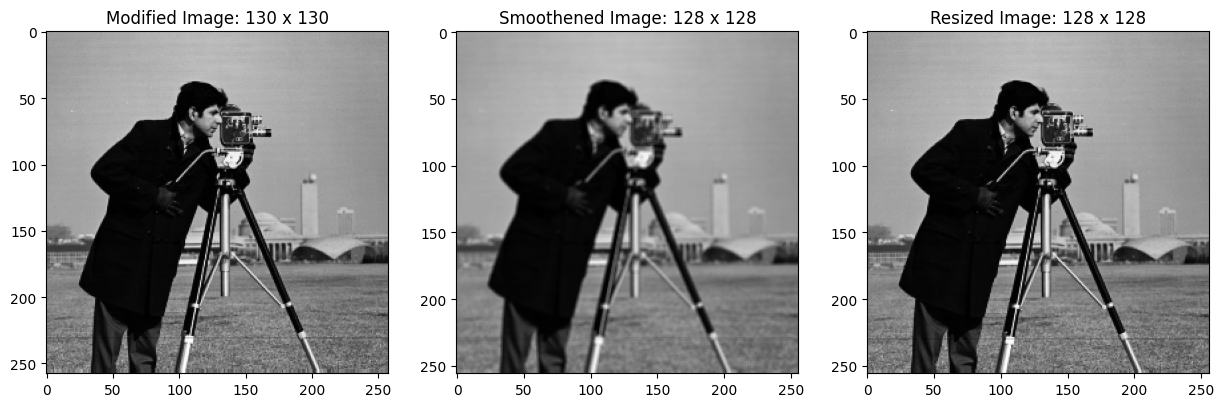

In [69]:
modified_img = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img[1:-1, 1:-1] = resized_img
modified_img[0, 1:-1] = resized_img[0,:]
modified_img[-1, 1:-1] = resized_img[-1,:]
modified_img[1:-1, 0] = resized_img[:,0]
modified_img[1:-1, -1] = resized_img[:,-1]
modified_img[0,0], modified_img[0,-1], modified_img[-1,-1], modified_img[-1,0] = resized_img[0,0], resized_img[0, -1], resized_img[-1,-1], resized_img[-1,0]

smoothened_img = np.zeros(shape = (256, 256))

for i in range(modified_img.shape[0]-2):
    for j in range(modified_img.shape[0]-2):
        smoothened_img[i,j] = int(sum(sum((1/9) * modified_img[i:i+3,j:j+3])))

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img, cmap = 'gray')
ax[1].imshow(smoothened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Image: 130 x 130')
ax[1].set_title('Smoothened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

Image Sharpening

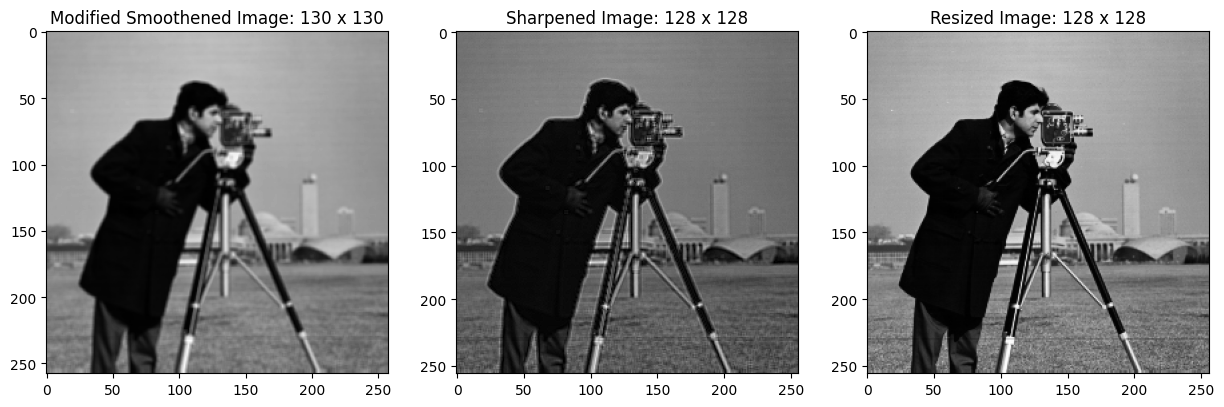

In [71]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (256, 256))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0:
            sharpened_img[i,j] = int(s)
        else:
            sharpened_img[i,j] = -int(s) # Dealing with Negative Values -> Taking absolute value


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

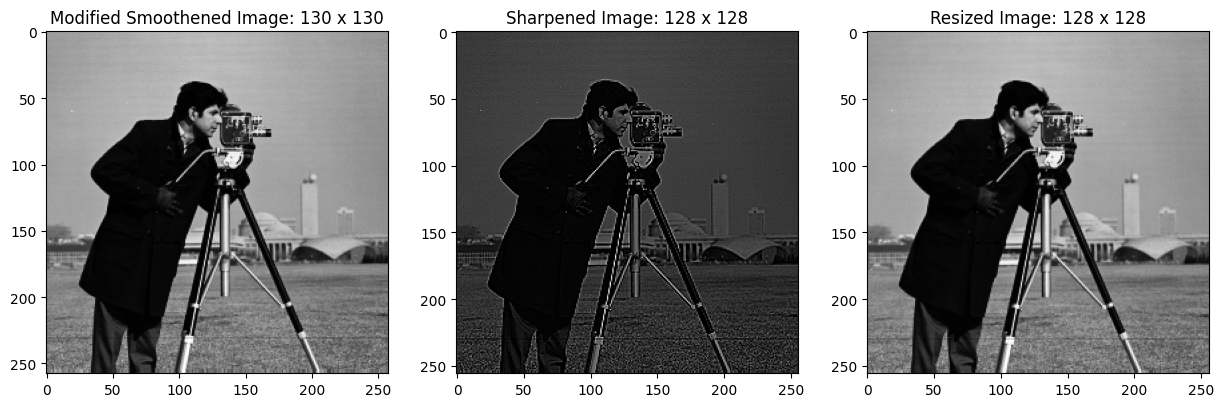

In [78]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = resized_img
modified_img1[0, 1:-1] = resized_img[0,:]
modified_img1[-1, 1:-1] = resized_img[-1,:]
modified_img1[1:-1, 0] = resized_img[:,0]
modified_img1[1:-1, -1] = resized_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = resized_img[0,0], resized_img[0, -1], resized_img[-1,-1], resized_img[-1,0]

sharpened_img = np.zeros(shape = (256, 256))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0:
            sharpened_img[i,j] = int(s)
        else:
            sharpened_img[i,j] = 0 # Dealing with Negative Values -> Clamping at 0


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

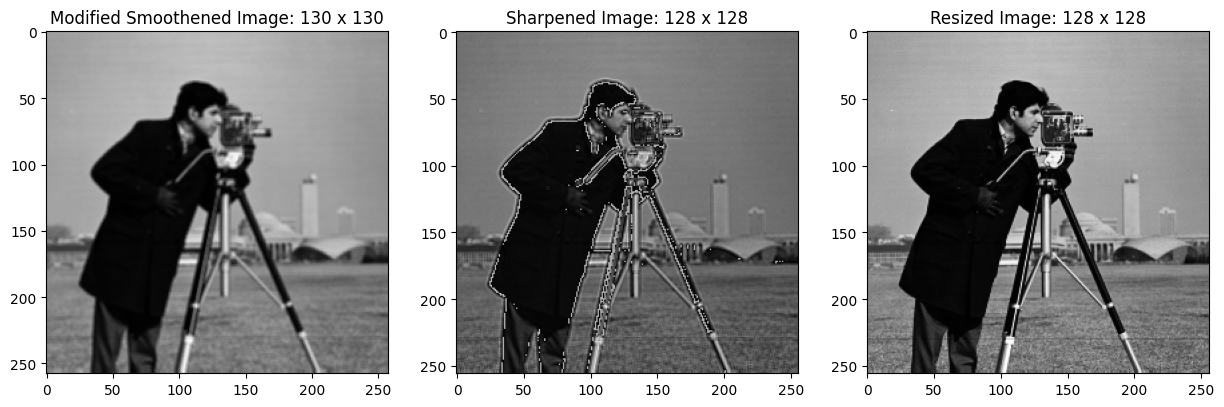

In [72]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (256, 256))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0:
            sharpened_img[i,j] = int(s)
        else:
            sharpened_img[i,j] = 256 + int(s) # Dealing with Negative Values -> Adding 256 to output


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

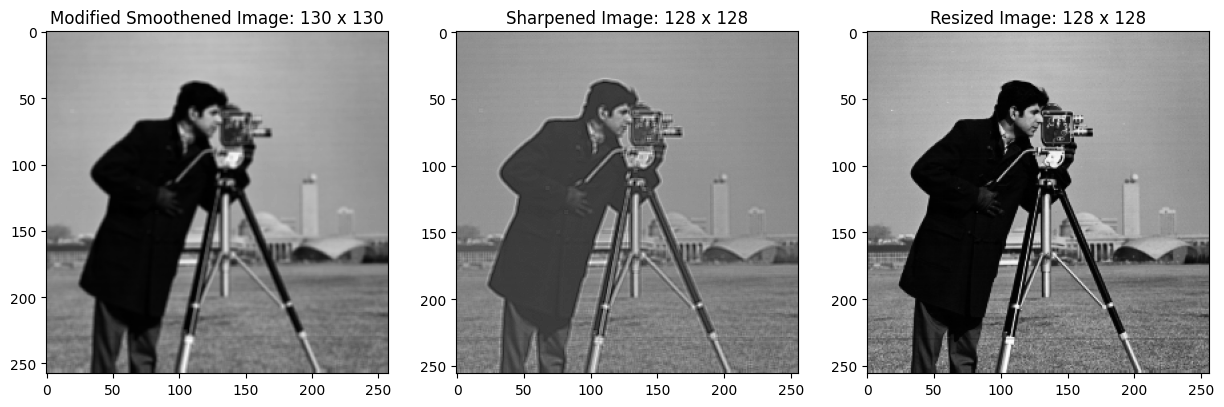

In [73]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (256, 256))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        sharpened_img[i,j] = int(sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))) # Doing nothing

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

Image Addition and Normalization

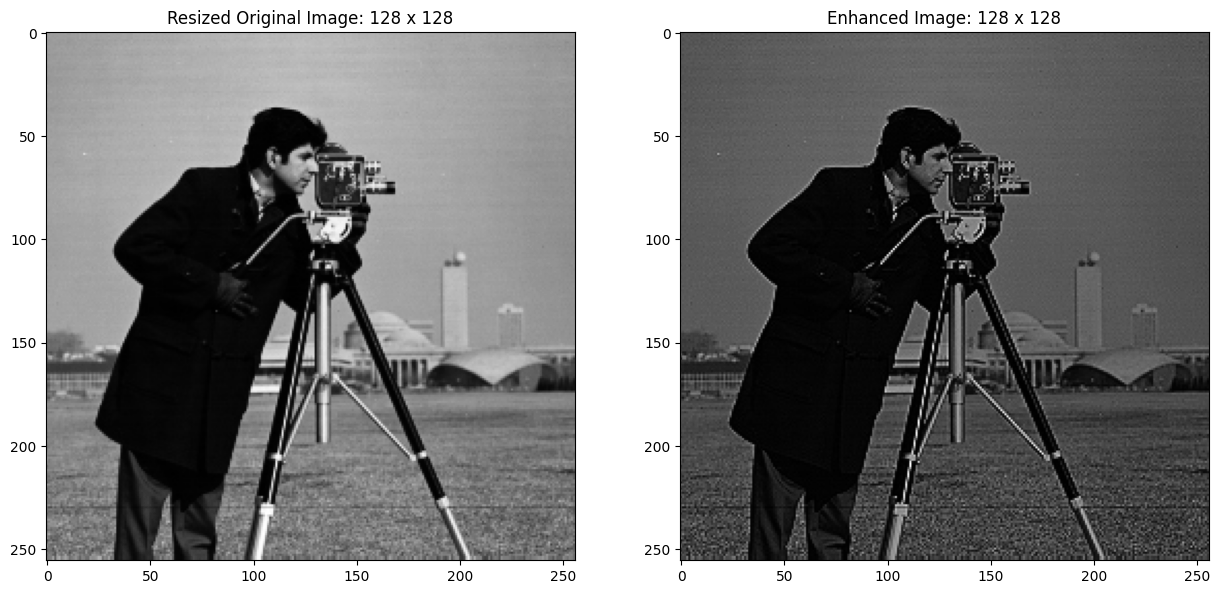

In [79]:
enhanced_img = (sharpened_img + resized_img)//2
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].imshow(resized_img, cmap = 'gray')
ax[1].imshow(enhanced_img, cmap = 'gray')
ax[1].set_title('Enhanced Image: 128 x 128')
ax[0].set_title('Resized Original Image: 128 x 128')
plt.show()